Load data

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./data-z2/train.csv', engine='python')
df = df.dropna()
df.drop_duplicates()

df_test = pd.read_csv('./data-z2/test.csv', engine='python')
df_test = df_test.drop_duplicates()
df_test = df_test.dropna()

Encode

In [15]:
label_encoder = LabelEncoder()

for column in df:
    if(df[column].dtype == "object"):
        df[column] = label_encoder.fit_transform(df[column])
        df_test[column] = label_encoder.fit_transform(df_test[column])

df.drop('Utilities', inplace=True, axis=1)
df_test.drop('Utilities', inplace=True, axis=1)

df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,90,3,87.0,9246,1,0,3,4,0,14,...,0,0,0,0,0,11,2008,8,4,135000
1,60,3,104.0,21535,1,0,3,0,0,15,...,0,0,0,0,0,1,2007,8,4,755000
2,60,3,86.0,10380,1,0,3,4,0,20,...,0,0,0,0,0,8,2007,8,4,301000
3,50,4,52.0,6240,1,3,3,4,0,3,...,0,0,0,0,400,9,2006,8,4,114500
4,20,3,74.0,8532,1,3,3,4,0,12,...,0,0,0,0,0,10,2009,8,4,153000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,30,3,40.0,4280,1,3,3,4,0,6,...,34,0,0,0,0,3,2007,8,4,90350
936,20,3,61.0,7943,1,3,3,4,0,19,...,39,0,0,0,0,4,2007,8,4,118500
937,20,3,141.0,31770,1,0,3,0,0,12,...,0,0,0,0,0,5,2010,8,4,215000
938,60,3,88.0,12665,1,0,3,4,0,23,...,0,0,0,0,0,2,2007,8,4,281213


Remove rows with TotalBsmtSF > 3000

In [16]:
df.drop(df.loc[df['TotalBsmtSF'] > 3000].index, inplace=True)

Corr matrix

In [17]:
# labels = [ i for i in df.columns]
# print(len(df.columns))
# print(len(labels))
# fig = plt.figure(figsize = (60, 60)) 
# ax = fig.add_subplot(111)
data_corr = df.corr()
# im = ax.imshow(data_corr)

# ax.set_xticks(np.arange(len(labels)))
# ax.set_yticks(np.arange(len(labels)))
# ax.set_xticklabels(labels)
# ax.set_yticklabels(labels)

# # Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation = 45, ha = "right",
#     rotation_mode = "anchor")

# # Loop over data dimensions and create text annotations.
# for i in range(len(labels)):
#    for j in range(len(labels)):
#         text = ax.text(j, i, np.around(data_corr.to_numpy()[i, j], 3),
#             ha = "center", va = "center", color = "w")

# fig.tight_layout()

Drop columns with low (< 0.5) correlation

In [18]:
i = 0
for column in data_corr['SalePrice']:
    if(column < 0.5):
        df.drop(df.columns[i], inplace = True, axis = 1)
        df_test.drop(df_test.columns[i], inplace = True, axis = 1)
        i -= 1
    i += 1

df

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,1973,1973,1656,1656,1656,2,8,2,506,135000
1,1994,1995,2444,2444,4316,3,10,3,832,755000
2,1986,1987,1502,1553,2730,2,8,2,576,301000
3,1934,1950,816,816,1176,1,6,2,528,114500
4,1954,1990,1297,1297,1297,1,5,2,498,153000
...,...,...,...,...,...,...,...,...,...,...
935,1913,2002,440,694,694,1,4,1,352,90350
936,1961,1961,1029,1029,1029,1,5,1,261,118500
937,1960,1960,1080,1656,1656,1,7,2,528,215000
938,2005,2006,1094,1133,2482,2,9,3,642,281213


New Corr

In [19]:
# labels = [ i for i in df.columns]
# print(len(df.columns))
# print(len(labels))
# fig = plt.figure(figsize = (10, 10)) 
# ax = fig.add_subplot(111)
# data_corr = df.corr()
# im = ax.imshow(data_corr)

# ax.set_xticks(np.arange(len(labels)))
# ax.set_yticks(np.arange(len(labels)))
# ax.set_xticklabels(labels)
# ax.set_yticklabels(labels)

# # Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=45, ha = "right",
#     rotation_mode = "anchor")

# # Loop over data dimensions and create text annotations.
# for i in range(len(labels)):
#    for j in range(len(labels)):
#         text = ax.text(j, i, np.around(data_corr.to_numpy()[i, j], 3),
#             ha = "center", va = "center", color = "w")

# fig.tight_layout()

Drop Columns

In [20]:
feature_cols = ['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageArea', 'GarageCars']
X = df[feature_cols]
y = df['SalePrice'].values.reshape(-1, 1)

X_test = df_test[feature_cols]
y_test = df_test['SalePrice'].values.reshape(-1, 1)

X

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageArea,GarageCars
0,1973,1973,1656,1656,1656,2,506,2
1,1994,1995,2444,2444,4316,3,832,3
2,1986,1987,1502,1553,2730,2,576,2
3,1934,1950,816,816,1176,1,528,2
4,1954,1990,1297,1297,1297,1,498,2
...,...,...,...,...,...,...,...,...
935,1913,2002,440,694,694,1,352,1
936,1961,1961,1029,1029,1029,1,261,1
937,1960,1960,1080,1656,1656,1,528,2
938,2005,2006,1094,1133,2482,2,642,3


Graphs

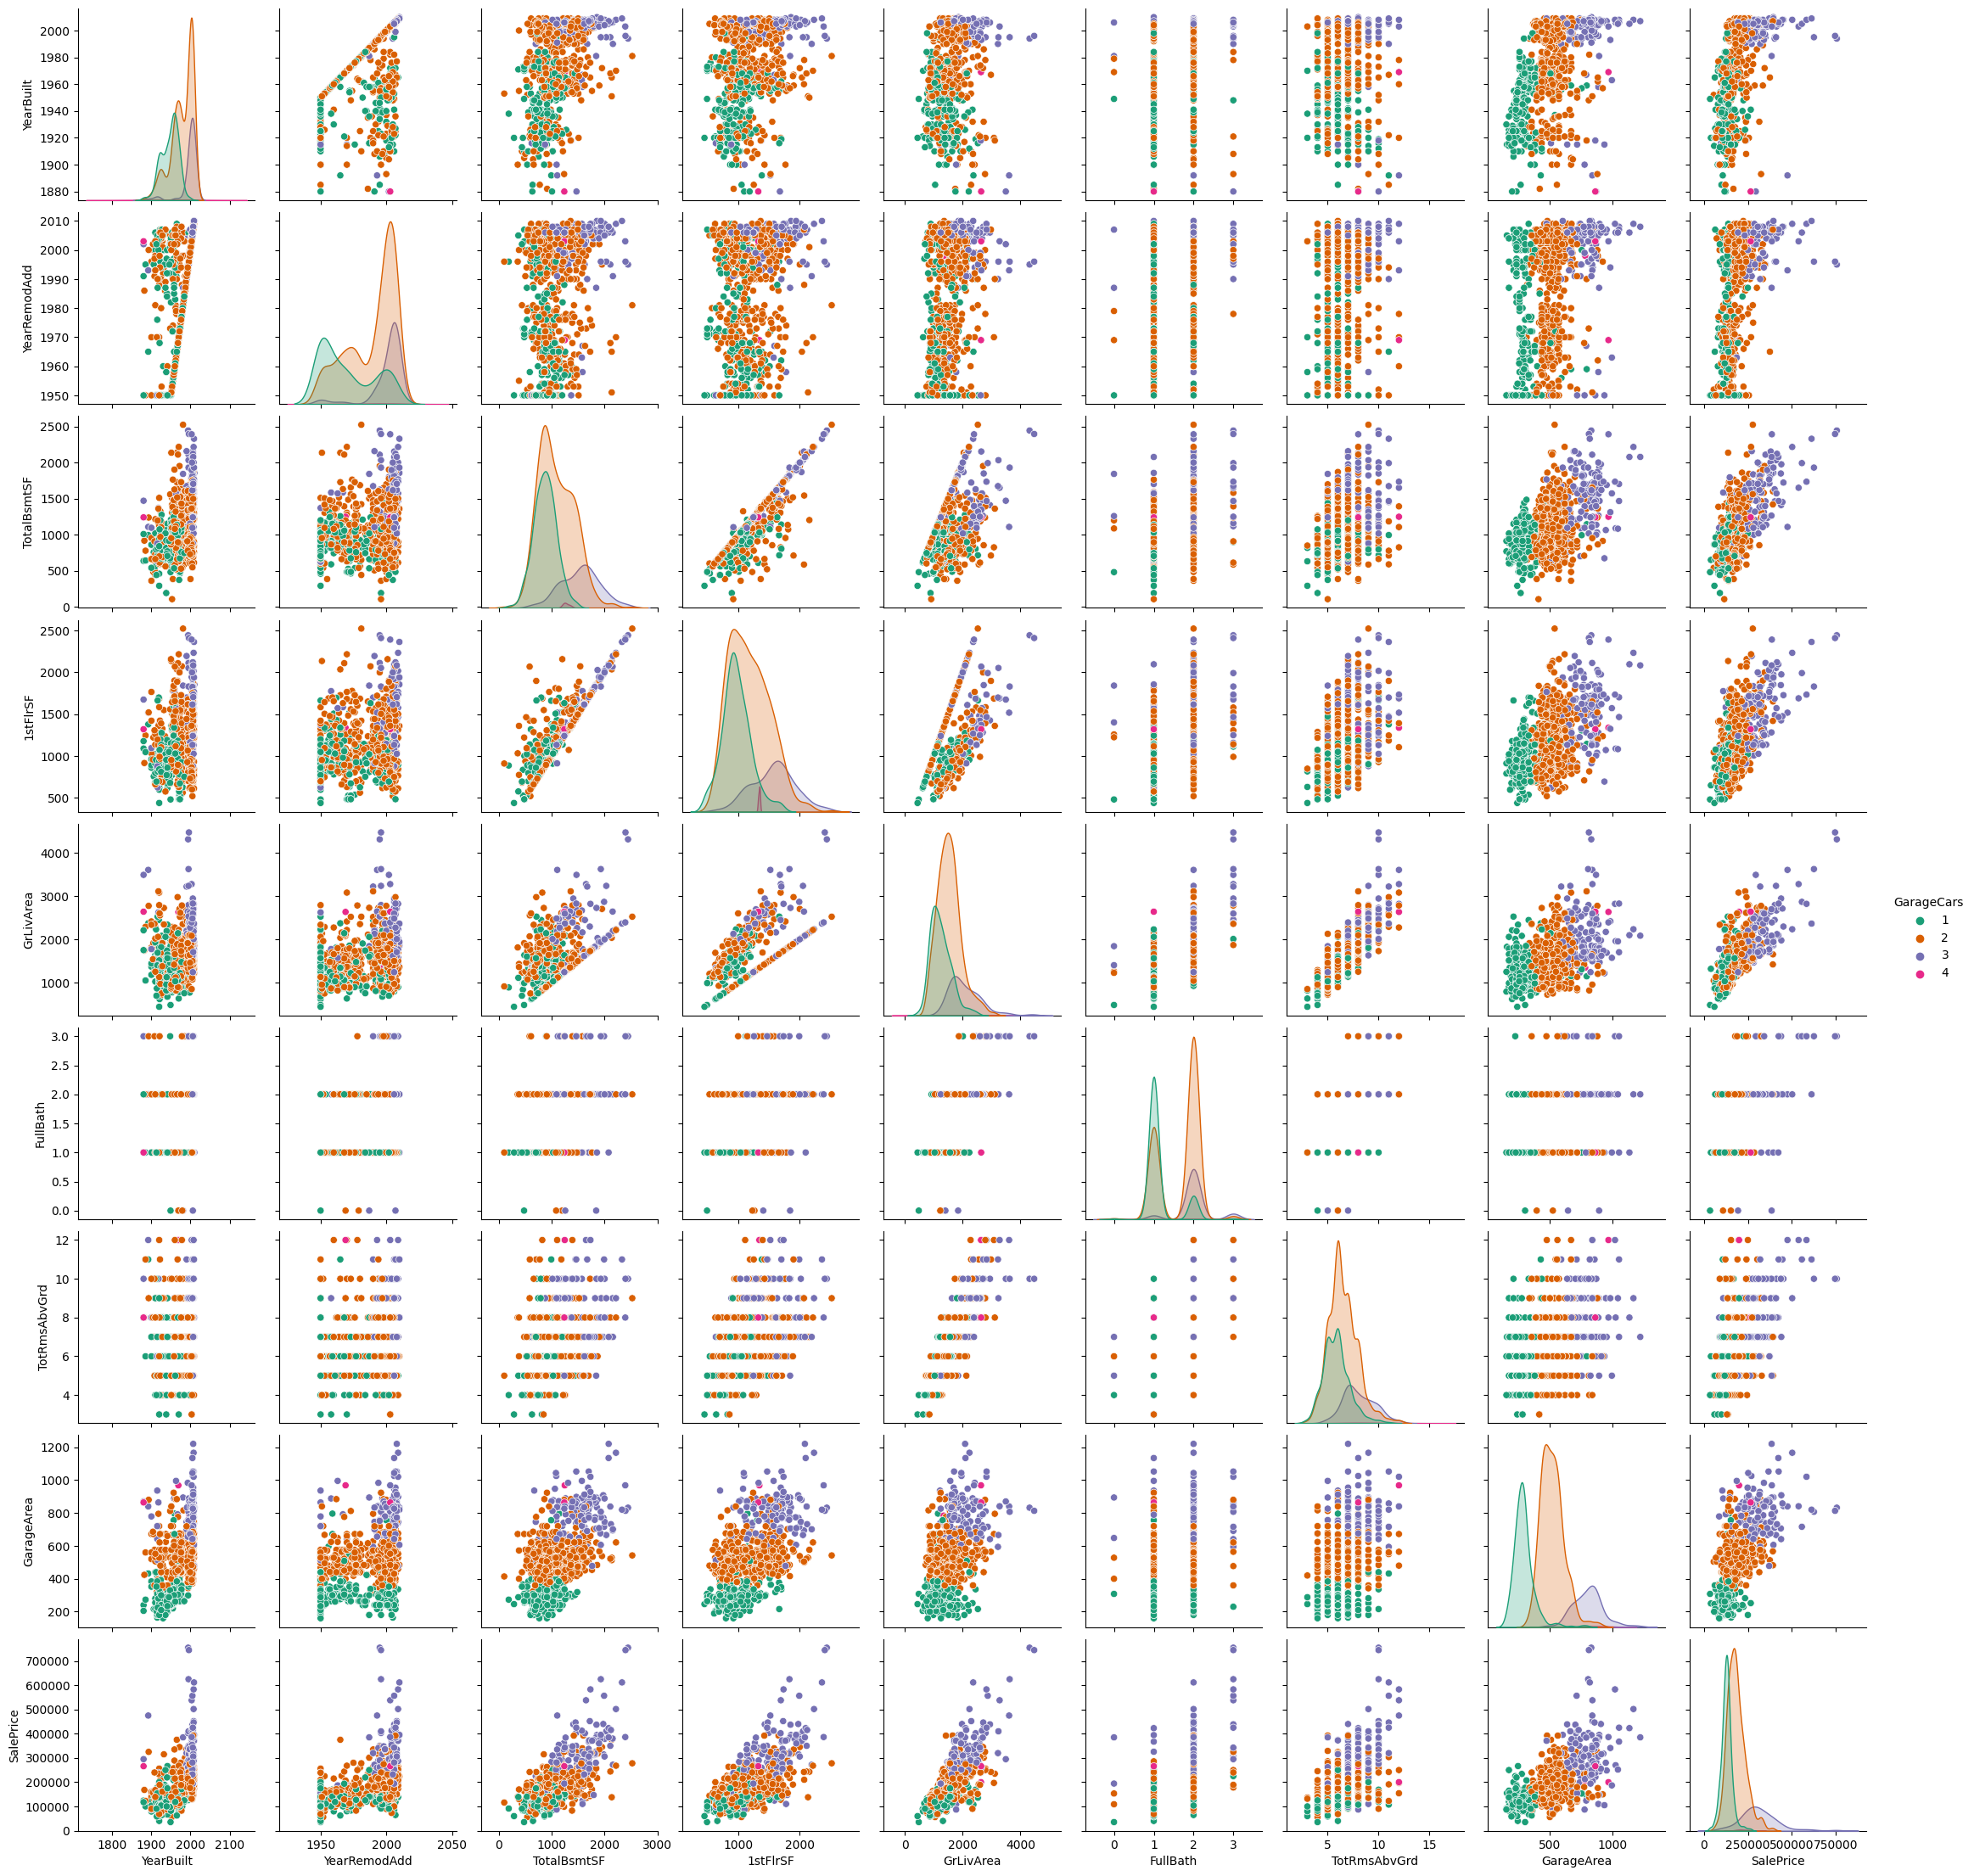

In [21]:
import seaborn as sns
sns.pairplot(df, hue = 'GarageCars', palette = 'Dark2')

EDA

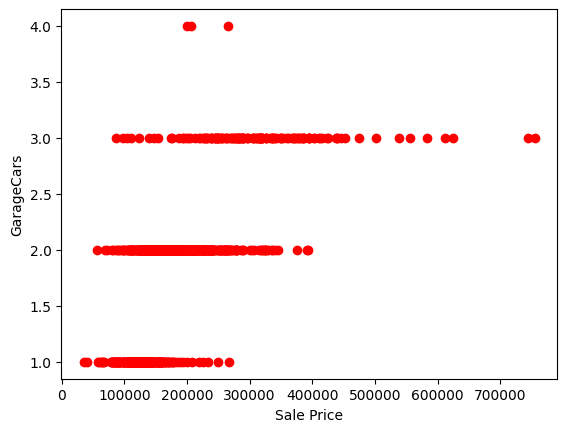

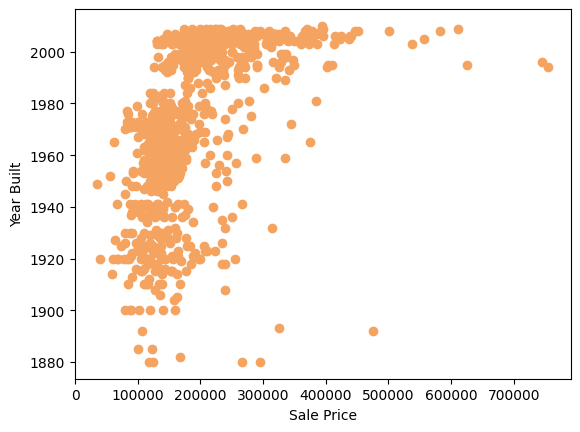

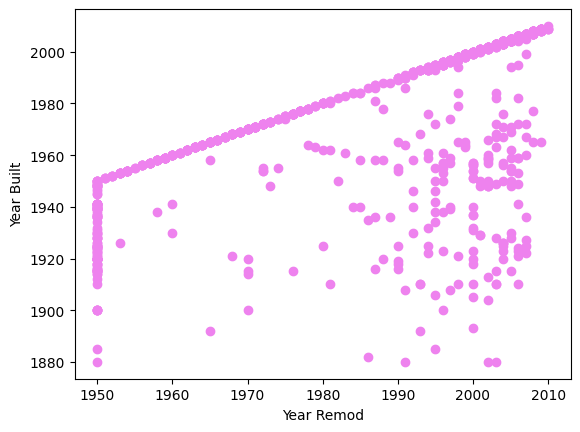

In [52]:
plt.scatter(x = df['SalePrice'], y = df['GarageCars'],
                  color = 'red')
plt.xlabel('Sale Price')
plt.ylabel('GarageCars')
plt.show()

plt.scatter(x = df['SalePrice'], y = df['YearBuilt'],
                  color = 'sandybrown')
plt.xlabel('Sale Price')
plt.ylabel('Year Built')
plt.show()

plt.scatter(x = df['YearRemodAdd'], y = df['YearBuilt'],
                  color = 'violet')
plt.xlabel('Year Remod')
plt.ylabel('Year Built')
plt.show()

Normalize

In [22]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler()
y_scaler = StandardScaler()
X = x_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)
X_test = x_scaler.fit_transform(X_test)
y_test = y_scaler.fit_transform(y_test)

Train (Grid search + Tree Classifier)

In [23]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

dec_tree = tree.DecisionTreeRegressor(random_state = 0)

param_grid = {
    'criterion': ['squared_error'],
    'min_samples_split': range(2, 10),
    'max_depth': range(2, 10),
    'min_samples_leaf': [20, 50, 100]
}

# clf_GS = GridSearchCV(dec_tree, param_grid = param_grid, scoring = 'r2', cv = 3)
# clf_GS.fit(X, y)
print()

Save Model

In [24]:
import joblib

# joblib.dump(clf_GS, './models/tree_model.joblib')
clf_GS = joblib.load('./models/tree_model.joblib')

['./models/tree_model.joblib']

Print results

In [25]:
# on the test or hold-out set
from sklearn.metrics import r2_score
print("R2 score: ", clf_GS.score(X_test, y_test.ravel()))

best_tree = clf_GS.best_estimator_

print('Best Parameters:', clf_GS.best_estimator_.get_params())

R2 score:  0.664551047577958
Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 9, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}


Tree

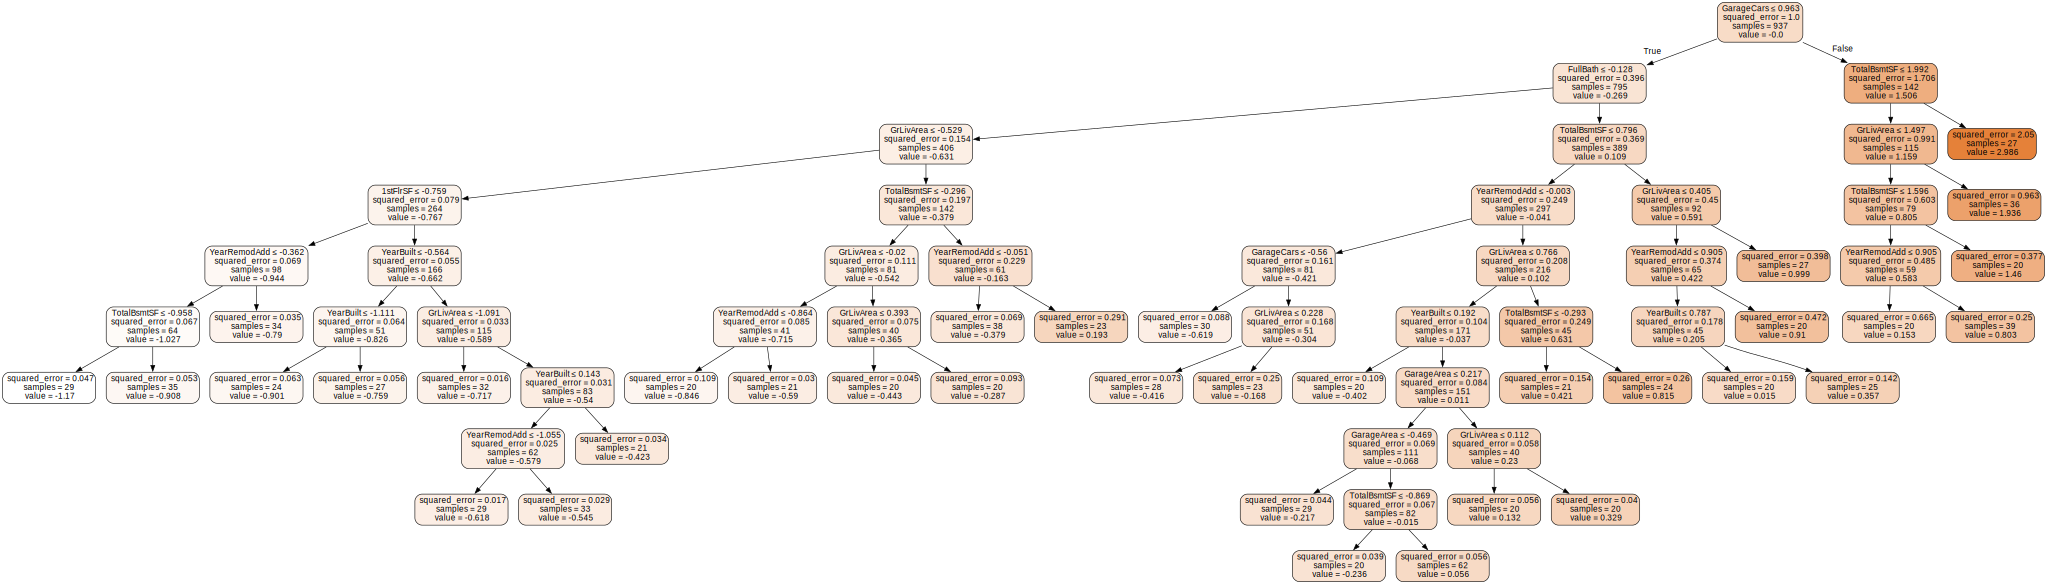

In [26]:
# tree.plot_tree(dec_tree)
# tree.plot_tree(clf_GS.best_estimator_.get_params()['dec_tree'])

from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(best_tree, filled = True, rounded = True,
                special_characters = True, feature_names = feature_cols, class_names = ['0','1'])
graph = graphviz.Source(dot_data)

graph

SVM

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

svr = GridSearchCV(
    SVR(),
    param_grid = {"kernel": ['rbf'], "C": [1e0, 1e1, 1e2, 1e3], "gamma": [0.01, 0.1, 1]},
    cv = 3
)
svr.fit(X, y.ravel())

def svr_eval(model, X, y, X_test, y_test):
      svr_reg_train = model.predict(X)
      print("SVR Train MSE: %.2f"
            % np.sqrt(mean_squared_error(y, svr_reg_train)))

      print("SVR Train R^2 Score: %.2f"
            % r2_score(y, svr_reg_train))

      svr_reg_test = model.predict(X_test)
      print("SVR Test MSE: %.2f"
            % np.sqrt(mean_squared_error(y_test, svr_reg_test)))

      print("SVR Test R^2 Score: %.2f"
            % r2_score(y_test, svr_reg_test))

svr_eval(svr, X, y, X_test, y_test)
best_model_svr = svr.best_estimator_

SVR Train MSE: 0.36
SVR Train R^2 Score: 0.87
SVR Test MSE: 0.40
SVR Test R^2 Score: 0.84


Another SVR

In [28]:
svr_2 = GridSearchCV(
    SVR(),
    param_grid = {"kernel": ['sigmoid'], "C": [1e0, 1e1, 1e2, 1e3], "gamma": [0.01, 0.1, 1]},
    cv = 3
)
svr_2.fit(X, y.ravel())

svr_eval(svr_2, X, y, X_test, y_test)

SVR Train MSE: 0.50
SVR Train R^2 Score: 0.75
SVR Test MSE: 0.49
SVR Test R^2 Score: 0.76


Visualization

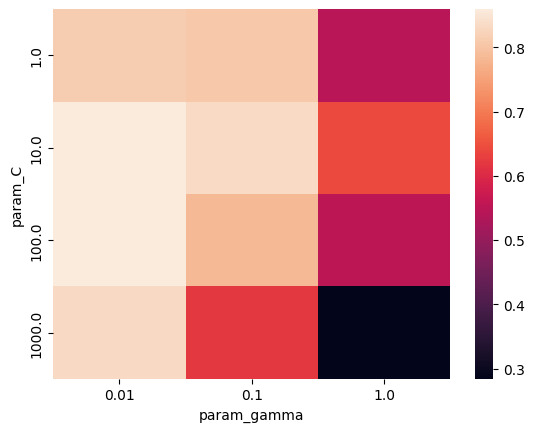

In [29]:
# heat map parm c aj gamma
import seaborn as sns

pvt = pd.pivot_table(pd.DataFrame(svr.cv_results_),
values = 'mean_test_score', index = 'param_C', columns = 'param_gamma')
ax = sns.heatmap(pvt)

Ensemble

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

n_estimators = [5, 20, 50, 100]
max_features = ['auto', 'sqrt']
max_depth = [int(X) for X in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# rf = RandomForestRegressor()
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
#                n_iter = 100, cv = 5, verbose = 2, random_state = 35, n_jobs = -1)

# rf_random.fit(X, y)
print()

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\janhr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

Save

In [31]:
import joblib

# joblib.dump(rf_random, './models/random_tree_model.joblib')
rf_random = joblib.load('./models/random_tree_model.joblib')

['./models/random_tree_model.joblib']

Print Results

In [32]:
# print('Random grid: ', random_grid, '\n')
# print the best parameters
print('Best Parameters: ', rf_random.best_params_, ' \n')
print("r2score:", rf_random.score(X_test, y_test))

best_random = rf_random.best_params_

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}  

r2score: 0.7707039208759212


Tree

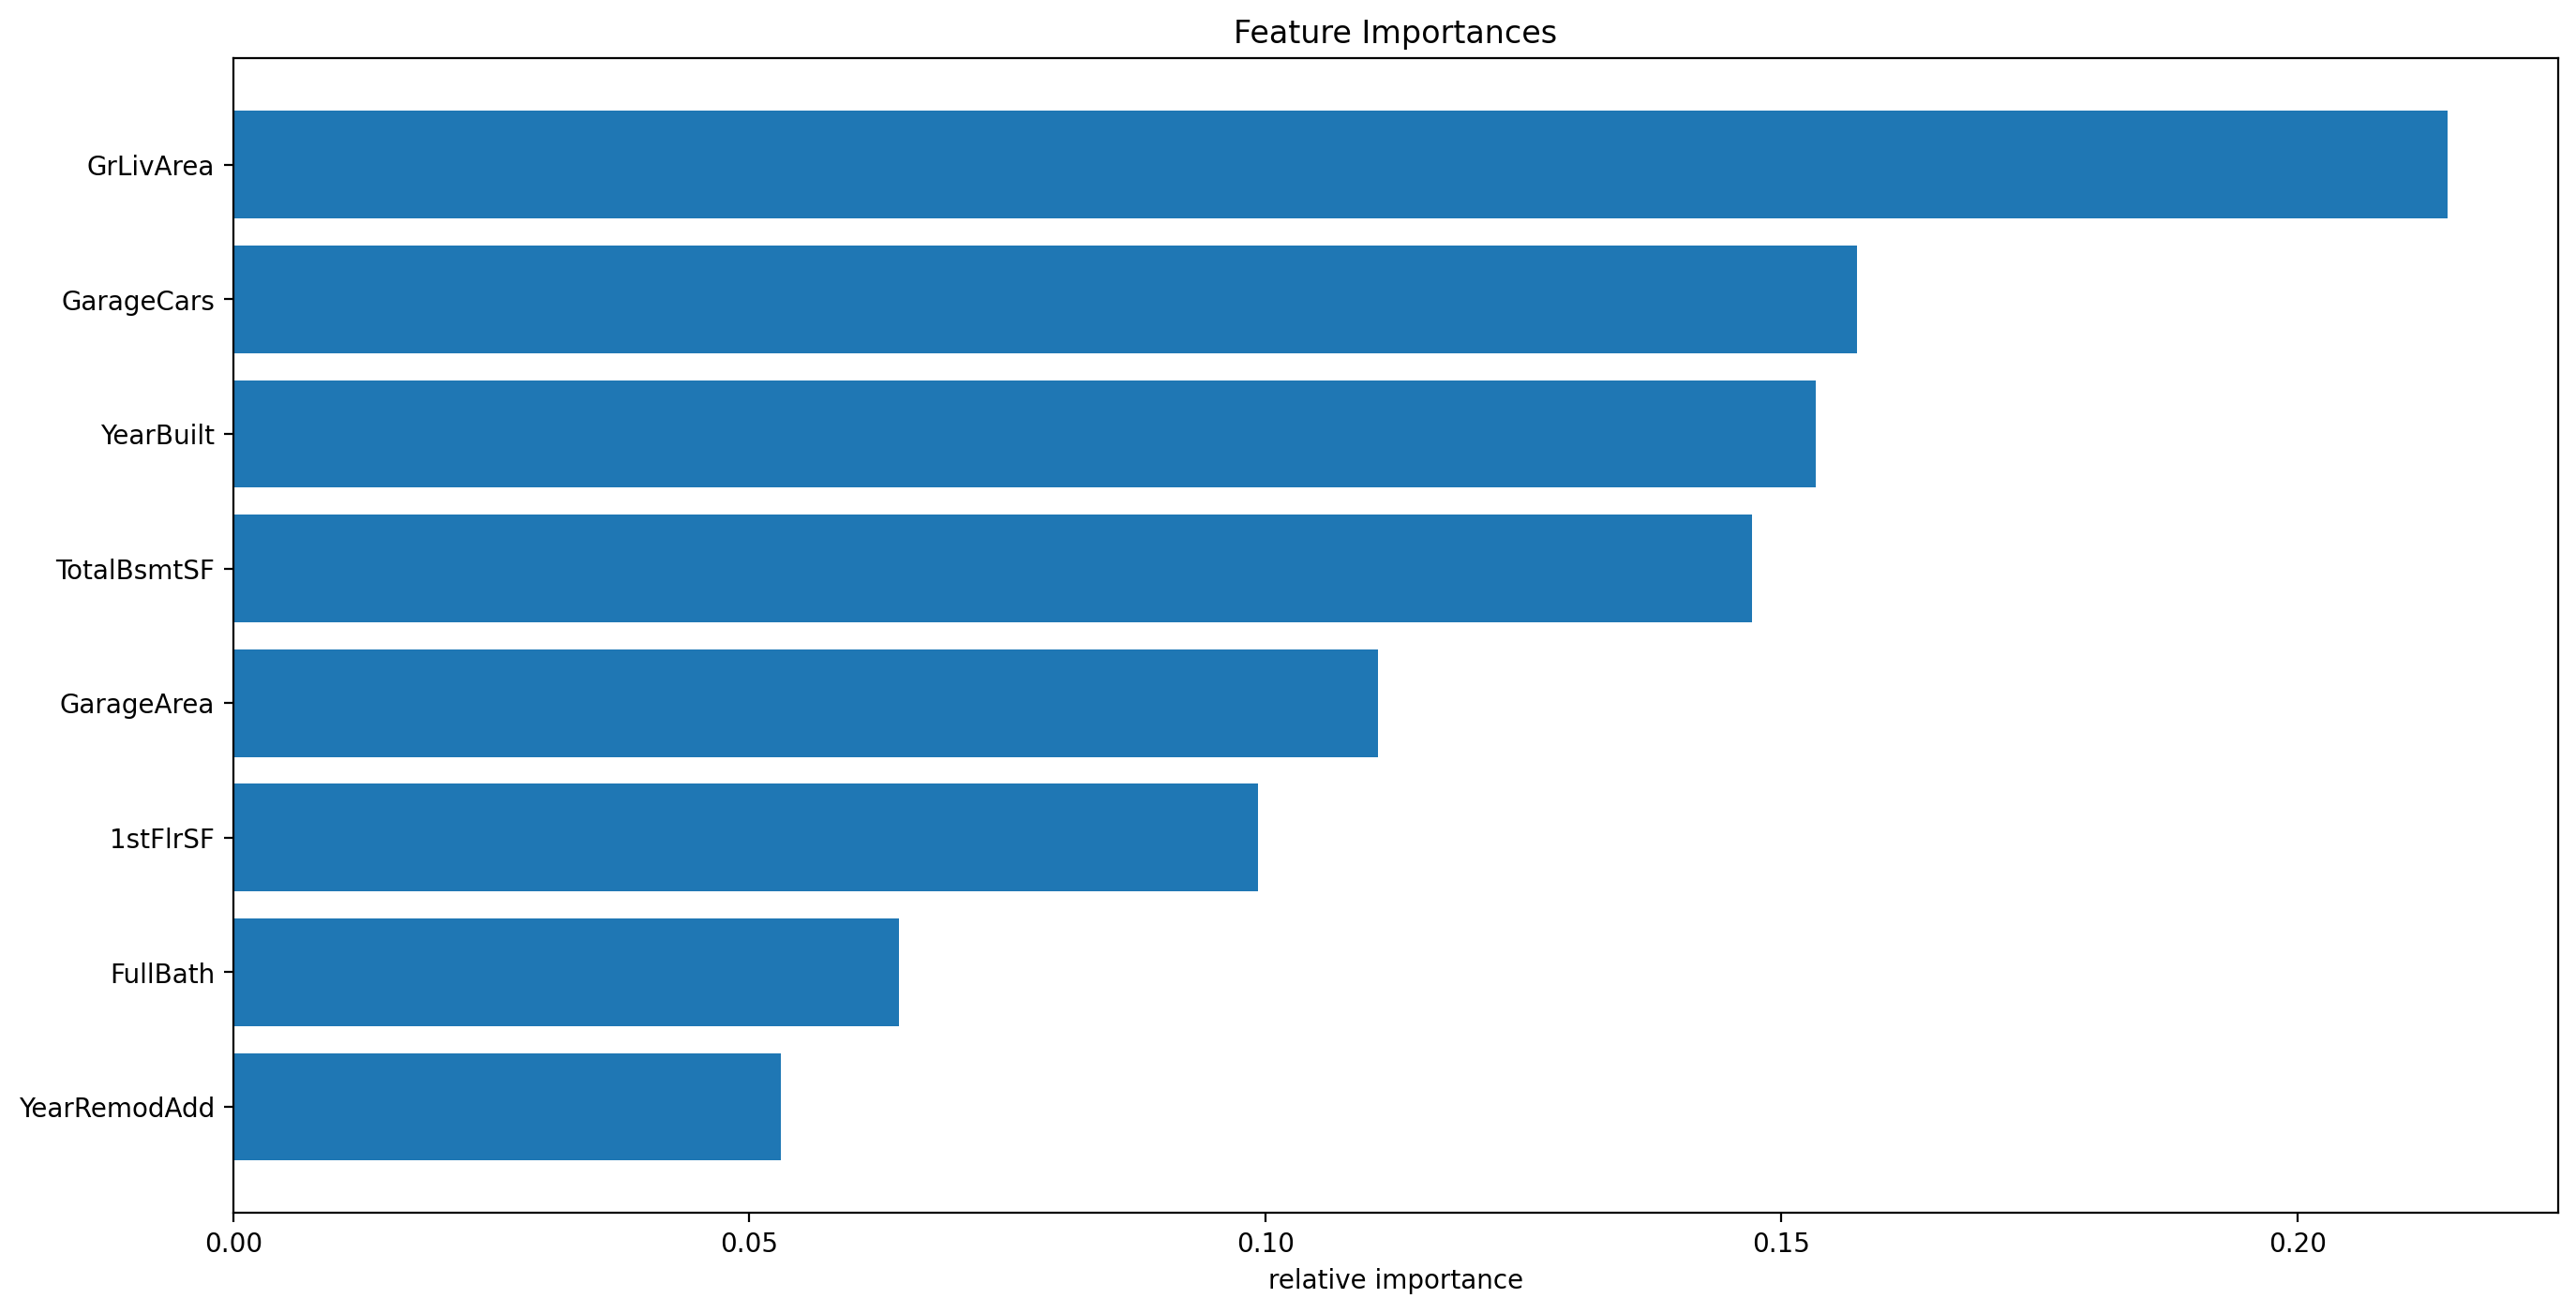

In [33]:
from matplotlib.pyplot import figure

def plot_importances(model):
    figure(figsize = (16, 8), dpi = 200)

    features = feature_cols
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], align = 'center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('relative importance')
    plt.show()

plot_importances(rf_random.best_estimator_)

Residual Plot

DecisionTreeRegressor(max_depth=9, min_samples_leaf=20, random_state=0)
SVR(C=10.0, gamma=0.01)
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


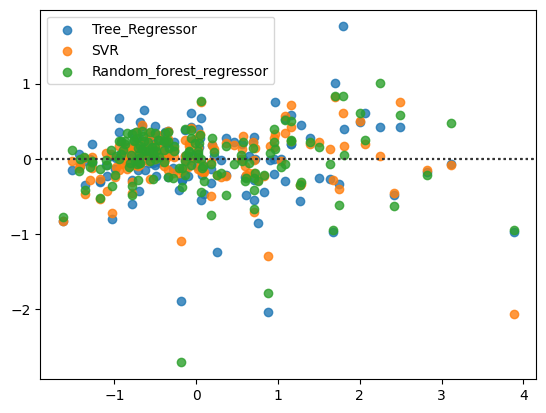

In [34]:
print(best_tree)

tuned_hyper_model = tree.DecisionTreeRegressor(min_samples_split = 9, random_state = 0)
tuned_hyper_model.fit(X, y)
tuned_pred = tuned_hyper_model.predict(X_test)

print(best_model_svr)

tuned_svr = GridSearchCV(
    SVR(kernel = "rbf"),
    param_grid = {"C": [10], "gamma": [0.1]}
)
tuned_svr.fit(X, y.ravel())
svr_tuned_pred = tuned_svr.predict(X_test)

print(best_random)

tuned_random = RandomForestRegressor(n_estimators = 20, min_samples_split = 10, min_samples_leaf = 4, max_features = 'auto', max_depth = 120, bootstrap = True)
tuned_random.fit(X, y.ravel())
random_tuned_pred = tuned_random.predict(X_test)

import seaborn as sns

sns.residplot(x = y_test, y=y_test[0] - tuned_pred, label = 'Tree_Regressor')
sns.residplot(x = y_test, y=y_test[0] - svr_tuned_pred, label = 'SVR')
ax = sns.residplot(x = y_test, y=y_test[0] - random_tuned_pred, label = 'Random_forest_regressor')
ax.legend()

3d

In [35]:
# Feature importance
# vystupnde data = sale price

import plotly.express as px

fig = px.scatter_3d(df, x = 'TotalBsmtSF', y = 'GrLivArea', z = 'GarageArea',
                    color = "SalePrice", size = "SalePrice" , size_max = 10, opacity = 0.7)
px.scatter_3d()
fig.show()

PCA

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca.fit(X)
X_trans = pd.DataFrame(pca.transform(X), columns=['GarageArea', 'GrLivArea', 'TotalBsmtSF'])

X_trans.head()

,GarageArea,GrLivArea,TotalBsmtSF
0,1.308933,1.461014,-0.319697
1,7.020477,3.333857,2.250326
2,2.224353,1.125052,1.063312
3,-1.976028,0.712588,0.174461
4,-0.225290,0.622013,-0.931423


Plot PCA

In [37]:
import plotly.express as px
fig_3d = px.scatter_3d(
    X_trans, x='TotalBsmtSF', y='GrLivArea', z='GarageArea',
    color=df['SalePrice'], labels={'color': 'SalePrice'}
)

fig_3d.update_traces(marker_size = 3)

PCA functions

In [38]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import time

def pca_model(n):
    pca = PCA(n_components = n)
    pca.fit_transform(X)
    svr_pca = SVR()

    steps = [('pca', pca), ('svr', svr_pca)]
    finalModel = Pipeline(steps = steps)

    param_grid = {
        'svr__C': [0.1, 1e0, 1e1, 1e2, 1e3], 
        'svr__gamma': [0.01, 0.1, 1, 10, 100],
        'svr__kernel': ['rbf']
    }
    
    start_time = time.time()

    grid = GridSearchCV(finalModel, param_grid, cv = 3)
    grid.fit(X, y.ravel())
    # svr_pca.fit(X, y.ravel())

    end_time = time.time()
    timer = round(end_time - start_time, 2)
    
    svr_reg_test = grid.predict(X_test)
    rt2 = round(r2_score(y_test, svr_reg_test), 2)

    return rt2, timer

PCA training

In [39]:
rt2 = []
timer = []

i, j = pca_model(2)
rt2.append(i)
timer.append(j)

i, j = pca_model(3)
rt2.append(i)
timer.append(j)

i, j = pca_model(5)
rt2.append(i)
timer.append(j)

i, j = pca_model(7)
rt2.append(i)
timer.append(j)

i, j = pca_model(8)
rt2.append(i)
timer.append(j)

print(rt2, timer)

[0.69, 0.75, 0.81, 0.84, 0.84] [42.36, 34.49, 31.5, 20.0, 28.61]


Plot

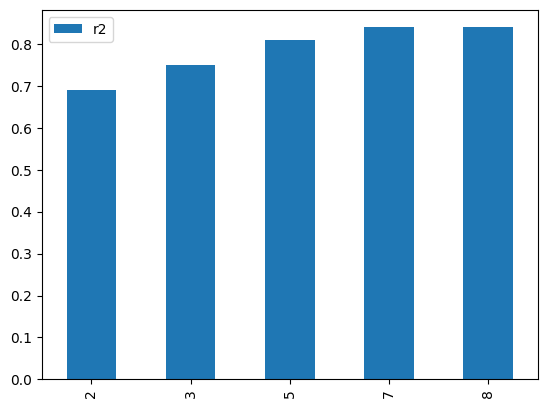

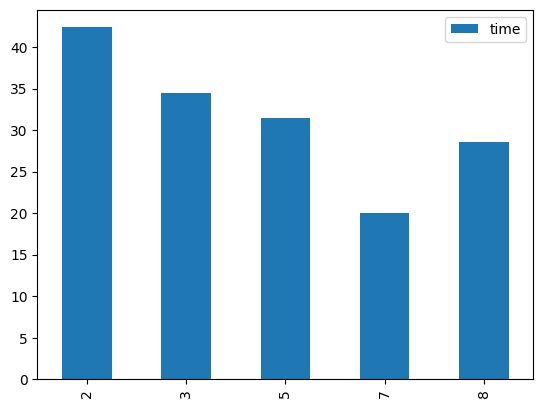

In [40]:
plotdata = pd.DataFrame(
    {"r2": rt2}, 
    index = ["2", "3", "5", "7", "8"])

plotdata.plot(kind = "bar")

plotdata = pd.DataFrame(
    {"time": timer}, 
    index = ["2", "3", "5", "7", "8"])

plotdata.plot(kind = "bar")
print()

Clusstering

In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, random_state = 0)
km_model = kmeans.fit(X)
predicted_km = km_model.predict(X)

fig_cluster = px.scatter_3d(
    df, hover_data = ["SalePrice"], x = 'TotalBsmtSF', y = 'GrLivArea', z = 'GarageArea',
    color = list(map(str, predicted_km)), labels={'color': "cluster"}, title = "Cluster"
)
fig_cluster.update_traces(marker_size = 5)
fig_cluster

Train cluster data

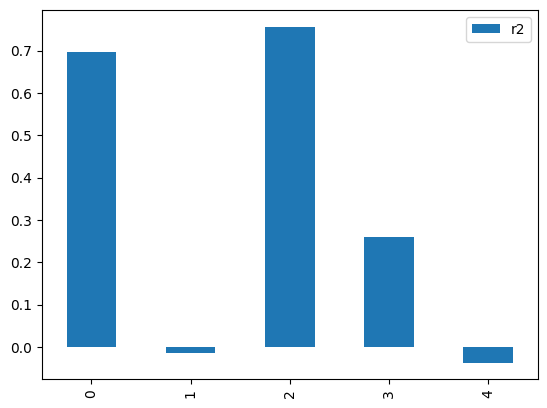

In [42]:
X_0 = []
X_1 = []
X_2 = []
X_3 = []
X_4 = []
y_0 = []
y_1 = []
y_2 = []
y_3 = []
y_4 = []

for i in range(0, len(predicted_km)):
    if(predicted_km[i] == 0):
        X_0.append(X[i])
        y_0.append(y[i])
    elif(predicted_km[i] == 1):
        X_1.append(X[i])
        y_1.append(y[i])
    elif(predicted_km[i] == 2):
        X_2.append(X[i])
        y_2.append(y[i])
    elif(predicted_km[i] == 3):
        X_3.append(X[i])
        y_3.append(y[i])
    else:
        X_4.append(X[i])
        y_4.append(y[i])

svr_final = GridSearchCV(
    SVR(),
    param_grid = {"kernel": ['rbf'], "C": [1e0, 1e1, 1e2, 1e3], "gamma": [0.01, 0.1, 1]},
    cv = 3
)
svr_final.fit(X_0, np.ravel(y_0))

r2_f = []

def svr_eval_final(model, X_test, y_test):
    svr_reg_test = model.predict(X_test)

    r2_f.append(r2_score(y_test, svr_reg_test))

svr_eval_final(svr_final, X_test, y_test)

svr_final.fit(X_1, np.ravel(y_1))
svr_eval_final(svr_final, X_test, y_test)

svr_final.fit(X_2, np.ravel(y_2))
svr_eval_final(svr_final, X_test, y_test)

svr_final.fit(X_3, np.ravel(y_3))
svr_eval_final(svr_final, X_test, y_test)

svr_final.fit(X_4, np.ravel(y_4))
svr_eval_final(svr_final, X_test, y_test)

plotdata = pd.DataFrame(
    {"r2": r2_f})

plotdata.plot(kind = "bar")
print()
